In [11]:
# Polished code
import numpy as np
from scipy import stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

class Statistics_test:
    def __init__(self, user_data):
        self.data = user_data 
    
    def total(self):
        print("Total sum:", np.sum(self.data))
    
    def count(self):
        print("Total count:", len(self.data))
    
    def minimum(self):
        print("Minimum value:", np.min(self.data))
    
    def maximum(self):
        print("Maximum value:", np.max(self.data))
    
    def data_range(self):
        print("Range of data:", np.max(self.data) - np.min(self.data))
    
    def average(self):
        print("Mean of data:", np.mean(self.data))
    
    def median(self):
        print("Median of data:", np.median(self.data))
        
    def mode(self):
            try:
                print("Mode:",stats.mode(self.data))
            except:
                print("No mode")
    
    def var(self):
        print("Variance:", np.var(self.data, ddof=1))
    
    def skew(self):
        print("Skewness:", stats.skew(self.data))
    
    def kurtosis(self):
        print("Kurtosis:", stats.kurtosis(self.data))
    
    def std_dev(self):
        return np.std(self.data, ddof=1)
    
    def q1(self):
        self.quartile1 = np.percentile(self.data, 25)
        print("Q1:", self.quartile1)
    
    def q3(self):
        self.quartile3 = np.percentile(self.data, 75)
        print("Q3:", self.quartile3)
    
    def iqr(self):
        self.iq_range = self.quartile3 - self.quartile1
        print("IQR:", self.iq_range)
    
    def lw(self):
        self.lower = self.quartile1 - 1.5 * self.iq_range
        print("Lower Whisker:", self.lower)
    
    def up(self):
        self.upper = self.quartile3 + 1.5 * self.iq_range
        print("Upper Whisker:", self.upper)
    
    def outliers_count(self):
        outliers = len([i for i in self.data if i > self.upper or i < self.lower])
        print("Total outliers count:", outliers)
    
    def shapiro_wilk_test(self):
        stat_val, p_value = shapiro(self.data)
        if p_value >= 0.05:
            print('Likely Follows Normal Distribution')
        else:
            print('Likely Does Not Follow Normal Distribution')
    
    def confidence_intervals(self):
        standard_error = self.std_dev() / np.sqrt(len(self.data))
        for conf, z in [(95, 1.96), (97, 2.17), (99, 2.576)]:
            moe = standard_error * z
            lower = np.mean(self.data) - moe
            upper = np.mean(self.data) + moe
            print(f'{conf}% Confidence Interval: {lower:.2f}, {upper:.2f}')
    
    def empirical_rule(self):
        vary = np.var(self.data, ddof=1)
        print("Variance:", vary)
        std_dev = np.sqrt(vary)
        for i in range(1, 4):
            lower = np.mean(self.data) - i * std_dev
            upper = np.mean(self.data) + i * std_dev
            perc = ((self.data >= lower) & (self.data <= upper)).sum()/ len(self.data)
            print(f'{i} Std Dev Range: ({lower:.2f} to {upper:.2f}) --> {perc*100:.2f}% of data')
    
    def visualize(self):
        if len(set(self.data)) < 7:
            plt.figure(figsize=(6, 6))
            sns.countplot(x=self.data)
            plt.show()

            plt.figure(figsize=(6, 6))
            data_count = pd.Series(self.data).value_counts()
            plt.pie(data_count, labels=data_count.index, autopct="%0.2f%%")  # fixed typo: 'lables' -> 'labels'
            plt.show()
        else:
            print("Detected continuous data.")
            plt.figure(figsize=(6, 6))
            sns.histplot(self.data, kde=True)
            plt.show()

            plt.figure(figsize=(6, 6))
            sns.boxplot(x=self.data)
            plt.show()
    
    def everything(self):
        self.total()
        self.count()
        self.minimum()
        self.maximum()
        self.data_range()
        self.average()
        self.median()
        self.mode()
        self.var()
        self.kurtosis()
        self.std_dev()
        self.skew()
        self.q1()
        self.q3()
        self.shapiro_wilk_test()
        self.iqr()
        self.lw()
        self.up()
        self.outliers_count()
        self.confidence_intervals()
        self.empirical_rule()
        self.visualize()


In [12]:
user_data=[23,45,64]

In [13]:
Statistics_test(user_data)


Total sum: 196
Total count: 8
Minimum value: 3
Maximum value: 65
Range of data: 62
Mean of data: 24.5
Median of data: 22.5
Mode: ModeResult(mode=array([3]), count=array([2]))
Variance: 436.0
Kurtosis: -0.206528087204918
Skewness: 0.8609210162649673
Q1: 10.5
Q3: 28.75
Likely Follows Normal Distribution
IQR: 18.25
Lower Whisker: -16.875
Upper Whisker: 56.125
Total outliers count: 1
95% Confidence Interval: 10.03, 38.97
97% Confidence Interval: 8.48, 40.52
99% Confidence Interval: 5.48, 43.52
Variance: 436.0
1 Std Dev Range: (3.62 to 45.38) --> 62.50% of data
2 Std Dev Range: (-17.26 to 66.26) --> 100.00% of data
3 Std Dev Range: (-38.14 to 87.14) --> 100.00% of data


<ipython-input-11-b3bdb4a9a723>:36: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print("Mode:",stats.mode(self.data))


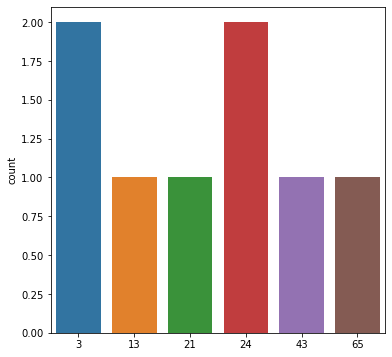

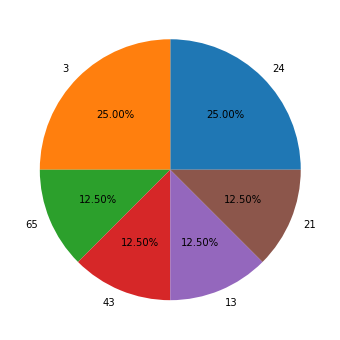

In [14]:
dummy=[43,24,13,3,24,21,3,65]
st_obj=Statistics_test(dummy)
st_obj.everything()


In [17]:
data=pd.Series([1,23,4,3,5,5,65,7])
data_filter=((data>2) & (data<23))

In [19]:
data_filter.sum()   #_______It just check true or false.

5

In [20]:
data_filter.count() #_________It counts total data no not works overhere.

8